## MongoDB

#### Iniciar cliente de mongo e importar librerías

In [1]:
import pymongo
import folium
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
warnings.filterwarnings('ignore')

connection = MongoClient('localhost', 27017)
db = connection.twitter
collection = db.tweets

print(collection.count(), 'documents')

966 documents


#### Los 10 tweets con más retweets

In [2]:
max_retweets = collection.find().sort('retweet_count', -1).limit(10)
data = pd.DataFrame(list(max_retweets), columns=['id_str', 'text', 'retweet_count'])
data

,id_str,text,retweet_count
0,594163852109094912,RT @alex_macdonald: I will fight to support th...,9132.0
1,594153080976998400,RT @EliLanger: There are 2 kinds of people in ...,4061.0
2,592371151445307392,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,3804.0
3,594153610633699329,"Meet Marilyn Mosby, the state's attorney who c...",3134.0
4,592383051004542976,Mourinho on Arsenal fans' chants: 'Boring is 1...,2610.0
5,592366832457220096,The overall death toll in the #NepalQuake has ...,2146.0
6,592371156625141760,FULL-TIME Arsenal 0-0 Chelsea. The Blues need ...,2069.0
7,591993187629211648,FULL TIME: There's the final whistle! #Messi &...,1810.0
8,592030680009330689,"RT @JordiAlba: Hoy día especial,un año que se ...",1793.0
9,592028831566921729,RT @3gerardpique: Gran victoria en Cornellà! S...,1661.0


#### Los 10 tweets con más favoritos

In [3]:
max_favorites = collection.find().sort('favorite_count', -1).limit(10)
data = pd.DataFrame(list(max_favorites), columns=['id_str', 'text', 'favorite_count'])
data

,id_str,text,favorite_count
0,592025821428191232,SEN ŞAMPİYON OLACAKSINNNNNNNN! \nSENİ SEVMEYEN...,1748.0
1,594153610633699329,"Meet Marilyn Mosby, the state's attorney who c...",1721.0
2,592030833319501824,Following the journey of two creatives and the...,1494.0
3,594162319355158528,"Eskiler, önce yoldaş sonra yol derdi. Eğer iyi...",1311.0
4,592383051004542976,Mourinho on Arsenal fans' chants: 'Boring is 1...,1105.0
5,592371151445307392,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,1099.0
6,592025253620101120,4ncü hakem uzatmayı gösterdi :( http://t.co/OP...,1092.0
7,591993187629211648,FULL TIME: There's the final whistle! #Messi &...,1011.0
8,592022338566234112,Emre Güral Volkan'ı kötürüm bıraktı :(,854.0
9,592366832457220096,The overall death toll in the #NepalQuake has ...,840.0


#### Ver  tweets del usuario @CsharpCorner

In [4]:
user_tweets = collection.find({'user.screen_name': 'CsharpCorner'})
data = pd.DataFrame(list(user_tweets), columns=['id_str', 'text', 'retweet_count', 'favorite_count', 'created_at'])
data

,id_str,text,retweet_count,favorite_count,created_at
0,594165361857069056,#MicrosoftBand SDK Available Now by @mcbeniwal...,19.0,4.0,Fri May 01 15:43:55 +0000 2015
1,594762014037180416,Learn Series of How to Crack Coding Interview ...,3.0,3.0,Sun May 03 07:14:48 +0000 2015
2,594754412456775681,RT @dbeniwal21: Free Ebook by @ksr007 Basic SQ...,5.0,0.0,Sun May 03 06:44:36 +0000 2015
3,591995296189534208,ServiceController Class in Windows Service by ...,2.0,0.0,Sat Apr 25 16:00:52 +0000 2015
4,592383013217939457,RT @mcbeniwal: Good #advice by @AnilAwadh on c...,1.0,0.0,Sun Apr 26 17:41:30 +0000 2015
5,594165671182802945,Are you ready &amp; #Excited for #Day3 #Build2...,20.0,4.0,Fri May 01 15:45:09 +0000 2015
6,592025506049961985,#Xamarin Guide 8: Change the App.cs to App.xam...,0.0,0.0,Sat Apr 25 18:00:54 +0000 2015
7,594787680254238720,MVC For Beginners: How to Save Record Using MV...,0.0,1.0,Sun May 03 08:56:48 +0000 2015
8,594165244273922048,#Build2015 Day3: About to start @CsharpCorner ...,18.0,5.0,Fri May 01 15:43:27 +0000 2015


#### Ver tweets con hashtag #Baltimore

In [5]:
hashtags = collection.find({'text': {'$regex': '#Baltimore'}})
data = pd.DataFrame(list(hashtags), columns=['id_str', 'text', 'retweet_count', 'favorite_count', 'created_at'])
data

,id_str,text,retweet_count,favorite_count,created_at
0,594164218674294784,#Baltimore reacts to charges against six polic...,12.0,2.0,Fri May 01 15:39:23 +0000 2015
1,594160878444015618,"RT @BBCNewsUS: #Baltimore police union says ""n...",76.0,0.0,Fri May 01 15:26:07 +0000 2015
2,592373717117890561,RT @BBCNewsUS: ICYMI: Thousands march in #Balt...,93.0,0.0,Sun Apr 26 17:04:34 +0000 2015
3,594154688720830464,MORE: 6 #Baltimore officers charged in #Freddi...,68.0,33.0,Fri May 01 15:01:31 +0000 2015
4,594157349679464450,#Baltimore State's attorney says all 6 officer...,45.0,28.0,Fri May 01 15:12:05 +0000 2015


#### Mostrar la localización de un tweet

In [6]:
user_geo = collection.find_one({'geo': {'$ne': None}})
coordinates = user_geo['geo']['coordinates']
place = user_geo['place']['full_name']
print(coordinates)

m = folium.Map(location=coordinates, zoom_start=12, tiles='OpenStreetMap')
folium.Marker(coordinates, popup=place).add_to(m)
m

[50.8212052, -0.13714063]


#### El usuario con más seguidores

In [7]:
max_followers = collection.find().sort('user.followers_count', -1).limit(1)
user = max_followers[0]['user']
print(user['name'])
print(int(user['statuses_count']), 'tweets')
print(int(user['followers_count']), 'followers')
print(user['description'])

from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://avatars.io/twitter/'+user['screen_name'])

Barack Obama
13440 tweets
58672161 followers
This account is run by Organizing for Action staff. Tweets from the President are signed -bo.


#### Tweets agrupados por idioma

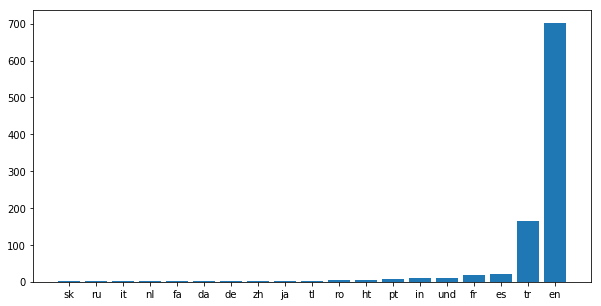

In [8]:
pipeline = [
    {'$group': {'_id': '$lang', 'count': {'$sum': 1}}},
    {'$sort': {'count': 1}}
]
tweets_by_lang = collection.aggregate(pipeline)
data = pd.DataFrame(list(tweets_by_lang))

plt.figure(figsize=(10, 5))
plt.bar(data['_id'], data['count'])
plt.show()

#### Tweets agrupados por fuente

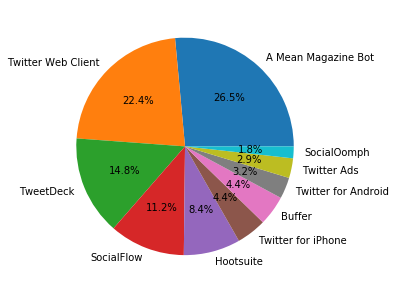

In [9]:
pipeline = [
    {'$group': 
      {
        '_id': {'$arrayElemAt': [{'$split': [{'$arrayElemAt': [{'$split': ['$source', '>']}, 1]}, '<']}, 0]},
        'count': {'$sum': 1}
      }
    },
    {'$sort': {'count': -1}},
    {'$limit': 10}
]
tweets_by_source = collection.aggregate(pipeline)
data = pd.DataFrame(list(tweets_by_source))

plt.figure(figsize=(10, 5))
plt.pie(data['count'], labels=data['_id'], autopct='%1.1f%%')
plt.show()

#### Los 10 tweets más recientes

In [10]:
tweets_by_date = [
    {'$project': 
      {
        '_id': '$id_str', 'text': '$text', 'user': '$user.screen_name',
        'created_at': {'$dateFromString': {'dateString': '$created_at'}}
      }
    }, 
    {'$sort': {'created_at': -1}},
    {'$limit': 10}
]
result = collection.aggregate(tweets_by_date)
data = pd.DataFrame(list(result), columns=['_id', 'user', 'text', 'created_at'])
data

,_id,user,text,created_at
0,594789566252453889,ameanmbot,RT @rvanhoepen: My @Quora answer to Is Angular...,2015-05-03 09:04:17
1,594789484916514816,ameanmbot,RT @kazuyadesse: 2件のコメント http://t.co/w6K1Dw6IJ...,2015-05-03 09:03:58
2,594789034016268288,ameanmbot,RT @haduart: Interesting #couchdb weekly http:...,2015-05-03 09:02:11
3,594788972854902784,mashable,"An affordable, real gold Apple Watch can be yo...",2015-05-03 09:01:56
4,594788791329632256,ameanmbot,RT @findmjob: Backend Devloper http://t.co/7dk...,2015-05-03 09:01:13
5,594788703018573824,ameanmbot,RT @webinara: RT: http://t.co/38hiPyvCAL #webi...,2015-05-03 09:00:52
6,594788642431852544,javacodegeeks,Testing with #Mockito - Kick-ass #Java Code Ge...,2015-05-03 09:00:37
7,594788594570686464,Inc,9 Interview Questions Ideo Asks @IlanMochari h...,2015-05-03 09:00:26
8,594788595652829184,ameanmbot,RT @webcodegeeks: A canonical web test in Node...,2015-05-03 09:00:26
9,594788522315292673,ChelseaFC,Keep up with the Blues today... http://t.co/Em...,2015-05-03 09:00:09


####  Los trending topics mundiales

In [11]:
pipeline = [
  {'$project':
     {'hashtags':
        {'$map': {
           'input': '$entities.hashtags',
           'as': 'entities',
           'in': {'$concat': ['#', '$$entities.text']}
        }},
     }
  },
  {'$unwind': '$hashtags'},
  {'$group': {'_id': '$hashtags', 'count': {'$sum': 1}}},
  {'$sort': {'count': -1}},
  {'$limit': 10}
]
trending_topics = collection.aggregate(pipeline)
data = pd.DataFrame(list(trending_topics))
data

,_id,count
0,#FCBLive,27
1,#AngularJS,21
2,#nodejs,20
3,#LFC,19
4,#EspanyolFCB,18
5,#webinar,16
6,#IWCI,16
7,#GlobalMoms,14
8,#javascript,14
9,#RedBizUK,12


### Geolocalización de todos los usuarios

In [24]:
m = folium.Map(location=[40, 0], zoom_start=3, tiles='OpenStreetMap')
list_users = list(collection.find({'place': {'$ne': None}}))
for user in list_users:
    place = user['place']['full_name']
    place_box = user['place']['bounding_box']
    folium.GeoJson(place_box, name=place).add_to(m)
m